In [87]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score

import matplotlib
%matplotlib inline

In [44]:
df = pd.read_csv("ks_projects.csv")

df.head(10)


,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.00,failed,0,GB,0.00,0.00,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.00,failed,15,US,100.00,2421.00,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.00,failed,3,US,220.00,220.00,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.00,failed,1,US,1.00,1.00,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.00,canceled,14,US,1283.00,1283.00,19500.00
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.00,successful,224,US,52375.00,52375.00,50000.00
6,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21,1000.0,2014-12-01 18:30:44,1205.00,successful,16,US,1205.00,1205.00,1000.00
7,1000030581,Chaser Strips. Our Strips make Shots their B*tch!,Drinks,Food,USD,2016-03-17,25000.0,2016-02-01 20:05:12,453.00,failed,40,US,453.00,453.00,25000.00
8,1000034518,SPIN - Premium Retractable In-Ear Headphones w...,Product Design,Design,USD,2014-05-29,125000.0,2014-04-24 18:14:43,8233.00,canceled,58,US,8233.00,8233.00,125000.00
9,100004195,STUDIO IN THE SKY - A Documentary Feature Film...,Documentary,Film & Video,USD,2014-08-10,65000.0,2014-07-11 21:55:48,6240.57,canceled,43,US,6240.57,6240.57,65000.00


In [38]:
cat_count = df.category.value_counts() 
top_cat = cat_count[cat_count >=1000]

top_cat = pd.DataFrame(top_cat)

# print (top_cat)

top_cat.head(10)

#just curious to know what are the top categories

,category
Product Design,22313
Documentary,16139
Music,15727
Tabletop Games,14180
Shorts,12357
Video Games,11829
Food,11493
Film & Video,10108
Fiction,9169
Fashion,8554


In [39]:
top_cat.tail(10)

,category
Wearables,1233
DIY,1173
Woodworking,1167
Farms,1154
People,1103
Faith,1092
Live Games,1050
Conceptual Art,1030
Television,1015
Performances,1013


In [40]:
df.groupby("main_category").nunique()

,name,category,main_category,currency,deadline,launched,state,backers,country,usd_pledged_real,usd_goal_real
main_category,,,,,,,,,,,
Art,28082,13,1,14,2946,28149,3,654,22,11620,6653
Comics,10800,6,1,13,2575,10817,3,920,21,6996,2515
Crafts,8786,15,1,13,2049,8808,3,363,20,3678,2551
Dance,3764,5,1,13,1961,3768,3,246,20,2566,850
Design,29982,7,1,14,2668,30058,3,2052,23,18805,8476
Fashion,22788,9,1,14,2621,22815,3,848,23,10361,6322
Film & Video,62960,20,1,14,3074,63572,3,1237,23,24167,11533
Food,24484,13,1,13,2665,24598,3,736,22,10312,5408
Games,35029,8,1,14,2694,35218,3,2499,23,21046,10209


In [41]:
df.groupby("category").nunique()

,name,category,main_category,currency,deadline,launched,state,backers,country,usd_pledged_real,usd_goal_real
category,,,,,,,,,,,
3D Printing,683,1,1,13,540,683,3,244,22,605,380
Academic,915,1,1,13,632,916,3,129,21,521,431
Accessories,3161,1,1,14,1196,3165,3,379,22,2329,1391
Action,739,1,1,10,545,740,3,109,17,408,351
Animals,255,1,1,9,213,255,3,66,15,187,162
Animation,2535,1,1,12,1587,2541,3,369,19,1591,835
Anthologies,782,1,2,11,583,784,3,371,18,722,364
Apparel,7159,1,1,14,1354,7165,3,458,23,3363,2252
Apps,6326,1,1,14,1342,6344,3,267,22,2681,2647


In [47]:
df.isnull().sum()

#checking null

ID                     0
name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64

In [8]:
df = df.drop("usd pledged", axis =1)

# usd pledged is similar to usd_pledged_real (or very subtle differences)

In [9]:
df = df.drop("ID", axis =1)

#ID cols is useless

In [10]:
df = df.drop("goal", axis =1)

#this is the same as usd_goal_real

In [11]:
df = df.drop("pledged", axis =1)

#this is the same as usd_pledged_real

In [12]:
#question here is does it mean usd_goal_real < usd_pledged_real means the project will be successful? 

In [13]:
df[df.name.isnull()]

,name,category,main_category,currency,deadline,launched,state,backers,country,usd_pledged_real,usd_goal_real
166851,NaN,Narrative Film,Film & Video,USD,2012-02-29,2012-01-01 12:35:31,failed,1,US,100.00,200000.00
307234,NaN,Video Games,Games,GBP,2013-01-06,2012-12-19 23:57:48,failed,12,GB,316.05,3224.97
309991,NaN,Product Design,Design,USD,2016-07-18,2016-06-18 05:01:47,suspended,0,US,0.00,2500.00
338931,NaN,Painting,Art,USD,2011-12-05,2011-11-06 23:55:55,failed,5,US,220.00,35000.00


In [14]:
df = df.dropna()

In [15]:
df.isnull().sum()

name                0
category            0
main_category       0
currency            0
deadline            0
launched            0
state               0
backers             0
country             0
usd_pledged_real    0
usd_goal_real       0
dtype: int64

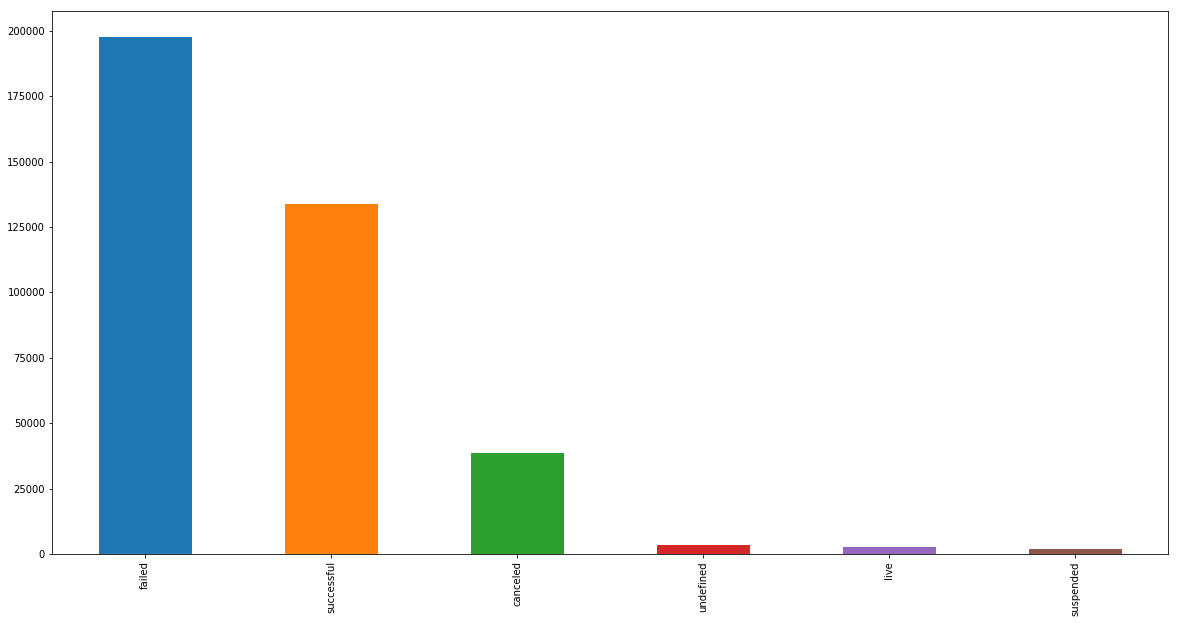

In [90]:
df.state.value_counts().plot(figsize=(20,10), kind ="bar")

In [17]:
df["state"] = df["state"].replace(["canceled","undefined","suspended"], "failed")

df.state.value_counts()

#use Live state as a test set 

failed        241902
successful    133956
live            2799
Name: state, dtype: int64

In [18]:
#not dropping any data even though it is imbalance because I believe making it 50:50 or not does not affect the model

In [19]:
df.country.value_counts()

US      292624
GB       33671
CA       14756
AU        7839
DE        4171
N,0"      3797
FR        2939
IT        2878
NL        2868
ES        2276
SE        1757
MX        1752
NZ        1447
DK        1113
IE         811
CH         761
NO         708
HK         618
BE         617
AT         597
SG         555
LU          62
JP          40
Name: country, dtype: int64

In [20]:
df.currency.value_counts()

USD    295362
GBP     34131
EUR     17405
CAD     14962
AUD      7950
SEK      1788
MXN      1752
NZD      1475
DKK      1129
CHF       768
NOK       722
HKD       618
SGD       555
JPY        40
Name: currency, dtype: int64

In [21]:
#replacing N,0" with country based on their respective currency
#Making the assumption that the country is based on the currency indicated 

In [22]:
df[df.country == 'N,0"']

,name,category,main_category,currency,deadline,launched,state,backers,country,usd_pledged_real,usd_goal_real
169,STREETFIGHTERZ WHEELIE MURICA,Film & Video,Film & Video,USD,2014-09-20,2014-08-06 21:28:36,failed,0,"N,0""",555.00,6500.00
328,Duncan Woods - Chameleon EP,Music,Music,AUD,2015-08-25,2015-08-04 12:05:17,failed,0,"N,0""",3402.08,3211.53
632,The Making of Ashley Kelley's Debut Album,Music,Music,USD,2015-04-09,2015-03-10 20:06:13,failed,0,"N,0""",3576.00,3500.00
647,Butter Side Down Debut Album,Music,Music,USD,2015-11-26,2015-11-02 22:09:19,failed,0,"N,0""",7007.80,6000.00
749,Chase Goehring debut EP,Music,Music,USD,2016-03-21,2016-02-23 03:09:49,failed,0,"N,0""",3660.38,3000.00
824,Spencer Capier Instrumental Project 2015,Music,Music,CAD,2014-10-10,2014-09-10 22:51:01,failed,0,"N,0""",4251.14,3572.39
844,LUKAS LIGETI'S 50TH BIRTHDAY FESTIVAL: ORIGINA...,Music,Music,USD,2015-06-11,2015-05-15 02:12:35,failed,0,"N,0""",6370.00,5000.00
864,The Battle For Breukelen: A Neighborhood Epic,Film & Video,Film & Video,USD,2015-11-07,2015-10-10 18:45:24,failed,0,"N,0""",6695.00,6000.00
870,"""Tamboura Plays Violin"" - a collection of Pop ...",Music,Music,USD,2015-03-28,2015-02-11 19:28:27,failed,0,"N,0""",2926.00,2750.00
890,Nightingale Noel - An A Cappella Holiday CD,Music,Music,USD,2015-12-11,2015-11-11 21:02:55,failed,0,"N,0""",1585.00,1200.00


In [23]:
#for each row, check country
#if country = N,0" , check currency and replace value in country
#if country != N,0", pass

In [24]:
country_list = {"USD":"US", 
                "GBP":"GB", 
                "CAD":"CA", 
                "EUR":"EU", 
                "AUD":"AU",
                "SEK":"SE",
                "NZD":"NZ",
                "DKK":"DK",
                "NOK":"NO",
                "CHF":"CH"}

In [25]:
for i in df.index:
    if df.loc[i,"country"]== 'N,0"':
         df.loc[i,"country"] = df.loc[i,"currency"]


In [26]:
df.country.value_counts()

US     292624
GB      33671
CA      14756
AU       7839
DE       4171
FR       2939
IT       2878
NL       2868
USD      2738
ES       2276
SE       1757
MX       1752
NZ       1447
DK       1113
IE        811
CH        761
NO        708
HK        618
BE        617
AT        597
SG        555
GBP       460
CAD       206
EUR       186
AUD       111
LU         62
JP         40
SEK        31
NZD        28
DKK        16
NOK        14
CHF         7
Name: country, dtype: int64

In [27]:
df = df.replace({"country":country_list})

df.country.value_counts()

US    295362
GB     34131
CA     14962
AU      7950
DE      4171
FR      2939
IT      2878
NL      2868
ES      2276
SE      1788
MX      1752
NZ      1475
DK      1129
IE       811
CH       768
NO       722
HK       618
BE       617
AT       597
SG       555
EU       186
LU        62
JP        40
Name: country, dtype: int64

In [68]:
import datetime as dt

lol = df["launched"] #.head()

In [70]:
type(lol)

pandas.core.series.Series

In [72]:
x = pd.to_datetime(lol)

In [75]:
y = x.dt

In [76]:
y.Date.dt.strftime("%Y%m%d").astype(int)

AttributeError: 'DatetimeProperties' object has no attribute 'Date'

In [77]:
### other hints and notes

In [80]:
emotion = input('enter how you are feeling:')

enter how you are feeling:sad


In [81]:
print('Derrick is {0}'.format(emotion))

Derrick is sad


In [82]:
table = 'dim_member'

In [84]:
sql_gen = 'SELECT * FROM {0}'.format(table)
print(sql_gen)

SELECT * FROM dim_member


What are the common factors that would make a kickstarter project successful? Two class categories